In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

education_original = education_df.copy()

In [3]:
#Using interpolation since data is time series data (helps with continuity, use with ordered data)

col_list = ['ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
           'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G',
           'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for col in col_list:
    education_df.loc[:,col].fillna(education_df.loc[:,col].interpolate(),inplace=True)

education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [4]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1491.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.267799
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978792
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.490023
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.617766
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.849675
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Points of interest:
<ul><li>There is a large magnitude of difference in std across the variables.</li>
    <li>The means of TOTAL_REVENUE and TOTAL_EXPENDITURE are very close.  This means that the state spends as much as it makes.</li>
    <li>On average, the STATE_REVENUE is larger than the FEDERAL_REVENUE and smaller than LOCAL_REVENUE.</li>
    <li>The means of the average math and reading scores are similar to the median meaning that the distributions for those variables are normal.</li>

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

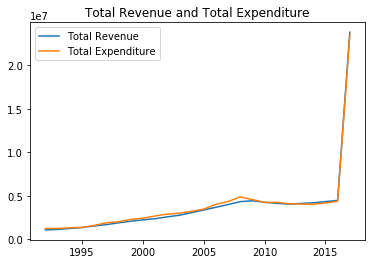

In [5]:
#Visualization Nevada's total revenues and total expenditures on a line graph
plt.plot(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
        education_df.loc[education_df.STATE == 'NEVADA', 'TOTAL_REVENUE'], label='Total Revenue')

plt.plot(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
        education_df.loc[education_df.STATE == 'NEVADA', 'TOTAL_EXPENDITURE'], label='Total Expenditure')

plt.title('Total Revenue and Total Expenditure')
plt.legend()
plt.show()

The two variables roughly follow the same trajectory throughout the years.  There is a steady increase in both total revenue and total expenditures.  There is a slight peak in total expenditures around 2007 or 2008 and there is a very sharp incline around 2016-2017 in both total revenue and total expenditures.  

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

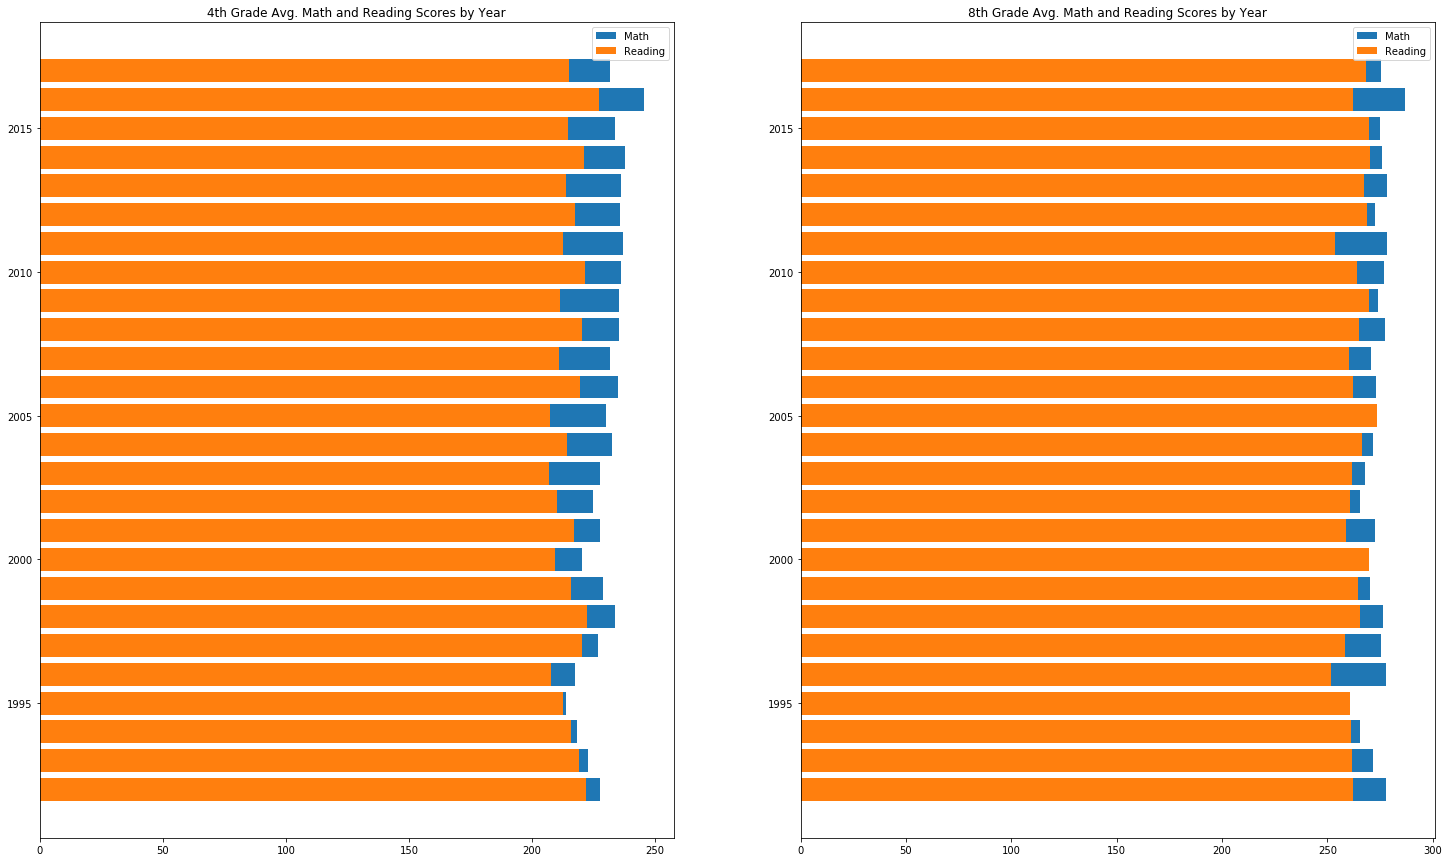

In [19]:
plt.figure(figsize=(25,15))

plt.subplot(1,2,1)
plt.barh(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
         education_df.loc[education_df.STATE == 'NEVADA', 'AVG_MATH_4_SCORE'],label='Math')
plt.barh(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
         education_df.loc[education_df.STATE == 'NEVADA', 'AVG_READING_4_SCORE'],label='Reading')
plt.legend()
plt.title('4th Grade Avg. Math and Reading Scores by Year')

plt.subplot(1,2,2)
plt.barh(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
         education_df.loc[education_df.STATE == 'NEVADA', 'AVG_MATH_8_SCORE'],label='Math')
plt.barh(education_df.loc[education_df.STATE == 'NEVADA', 'YEAR'],
         education_df.loc[education_df.STATE == 'NEVADA', 'AVG_READING_8_SCORE'],label='Reading')

plt.legend()
plt.title('8th Grade Avg. Math and Reading Scores by Year')

plt.show()

In both 4th and 8th grades math scores outperform reading scores, except for 8th graders in 1995, 2000, and 2005. 

### 4. What are the distributions of the math and reading scores in the sample?

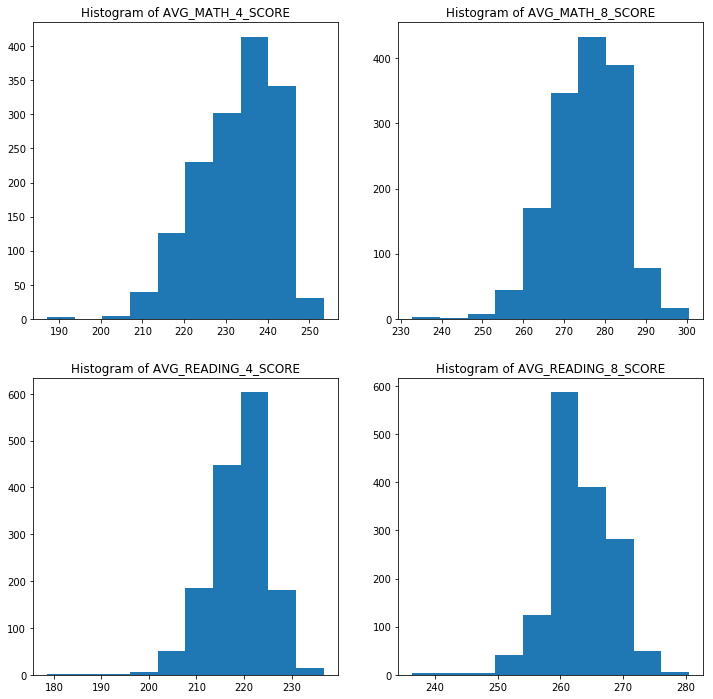

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_MATH_4_SCORE)
plt.title('Histogram of AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_8_SCORE)
plt.title('Histogram of AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_4_SCORE)
plt.title('Histogram of AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(education_df.AVG_READING_8_SCORE)
plt.title('Histogram of AVG_READING_8_SCORE')

plt.show()

The distributions are normally distributed for both math and reading in 4th and 8th grades.

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

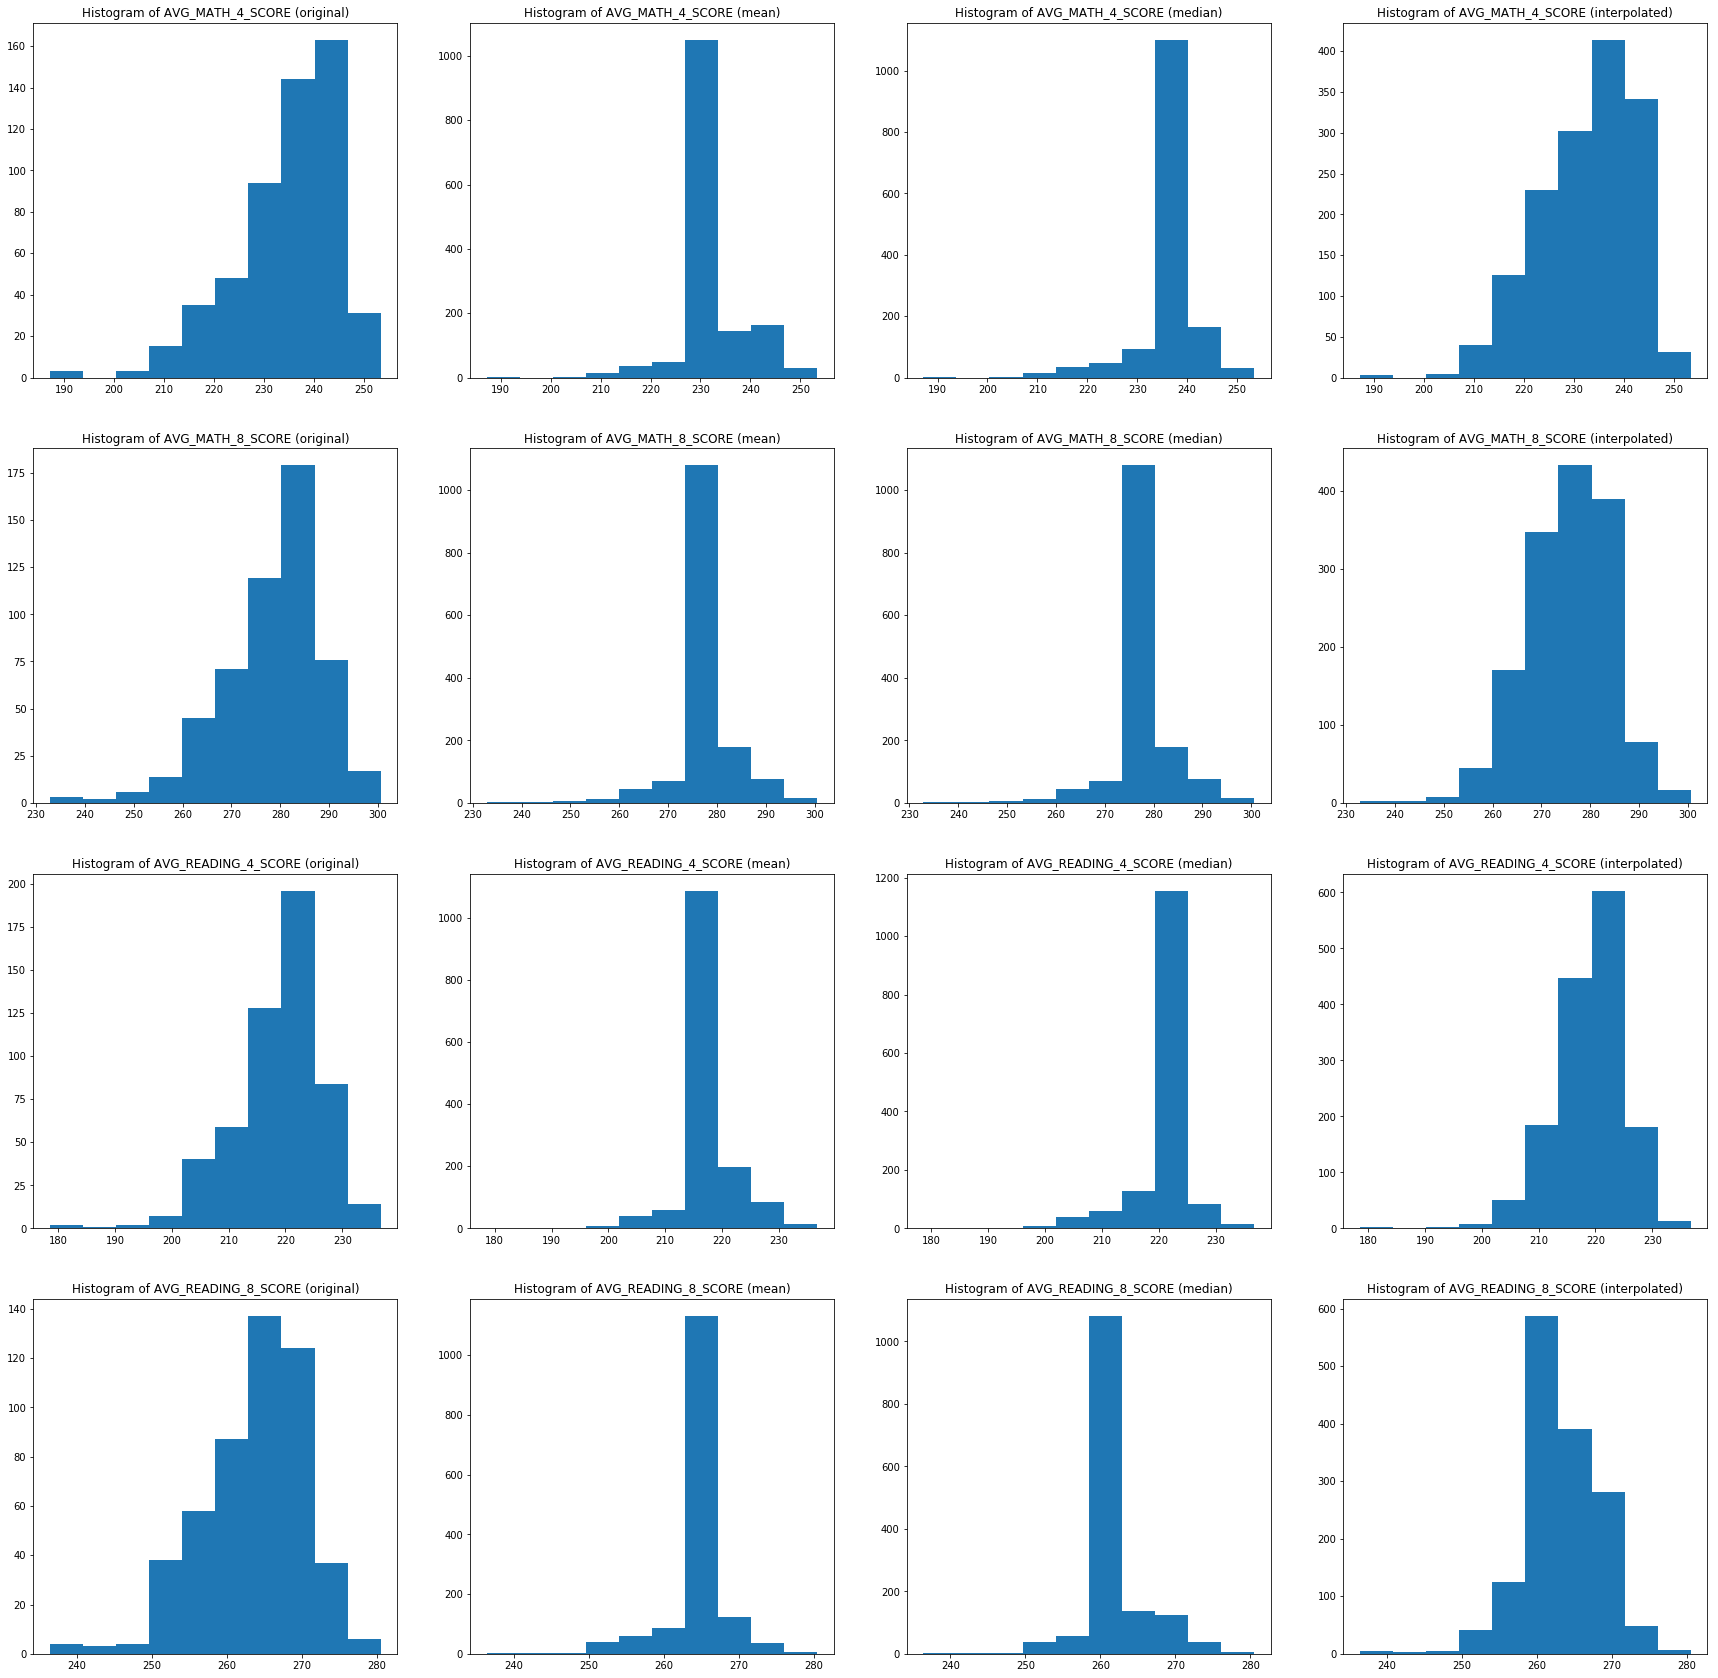

In [7]:
#Used original education dataset with missing variables for this question instead of the interpolated dataset that I used for 
#the other questions which had all the missing values already filled in
plt.figure(figsize=(30,30))

plt.subplot(4,4,1)
plt.hist(education_original.AVG_MATH_4_SCORE)
plt.title('Histogram of AVG_MATH_4_SCORE (original)')

plt.subplot(4,4,2)
plt.hist(education_original.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title('Histogram of AVG_MATH_4_SCORE (mean)')

plt.subplot(4,4,3)
plt.hist(education_original.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title('Histogram of AVG_MATH_4_SCORE (median)')

plt.subplot(4,4,4)
plt.hist(education_original.AVG_MATH_4_SCORE.interpolate())
plt.title('Histogram of AVG_MATH_4_SCORE (interpolated)')

plt.subplot(4,4,5)
plt.hist(education_original.AVG_MATH_8_SCORE)
plt.title('Histogram of AVG_MATH_8_SCORE (original)')

plt.subplot(4,4,6)
plt.hist(education_original.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title('Histogram of AVG_MATH_8_SCORE (mean)')

plt.subplot(4,4,7)
plt.hist(education_original.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title('Histogram of AVG_MATH_8_SCORE (median)')

plt.subplot(4,4,8)
plt.hist(education_original.AVG_MATH_8_SCORE.interpolate())
plt.title('Histogram of AVG_MATH_8_SCORE (interpolated)')

plt.subplot(4,4,9)
plt.hist(education_original.AVG_READING_4_SCORE)
plt.title('Histogram of AVG_READING_4_SCORE (original)')

plt.subplot(4,4,10)
plt.hist(education_original.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title('Histogram of AVG_READING_4_SCORE (mean)')

plt.subplot(4,4,11)
plt.hist(education_original.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title('Histogram of AVG_READING_4_SCORE (median)')

plt.subplot(4,4,12)
plt.hist(education_original.AVG_READING_4_SCORE.interpolate())
plt.title('Histogram of AVG_READING_4_SCORE (interpolated)')

plt.subplot(4,4,13)
plt.hist(education_original.AVG_READING_8_SCORE)
plt.title('Histogram of AVG_READING_8_SCORE (original)')

plt.subplot(4,4,14)
plt.hist(education_original.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title('Histogram of AVG_READING_8_SCORE (mean)')

plt.subplot(4,4,15)
plt.hist(education_original.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title('Histogram of AVG_READING_8_SCORE (median)')

plt.subplot(4,4,16)
plt.hist(education_original.AVG_READING_8_SCORE.interpolate())
plt.title('Histogram of AVG_READING_8_SCORE (interpolated)')

plt.show()

The techniques used to fill in the missing values change the distribution of the variables.  

The largest effects occur when filling in the missing values with the mean and median when compared against the original dataset.  However, filling in with the mean and median produced similar distributions between each of the variables. 

The interpolation technique produced a more normal distribution than the median and mean and is the best method to apply to clean this dataset.  